In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sns.set(style='whitegrid')

In [49]:
df = pd.read_csv(r"C:\Users\Shiva anand reddy\Downloads\Coca-Cola_stock_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [52]:
# Step 1: Clean and convert
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '')
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce', utc=True)
df.ffill(inplace=True)
df.fillna(0, inplace=True)

In [53]:
df['ma_20'] = df['close'].rolling(window=20).mean()
df['ma_50'] = df['close'].rolling(window=50).mean()
df['daily_return'] = df['close'].pct_change()
df['volatility'] = df['daily_return'].rolling(window=20).std()
df.dropna(inplace=True)

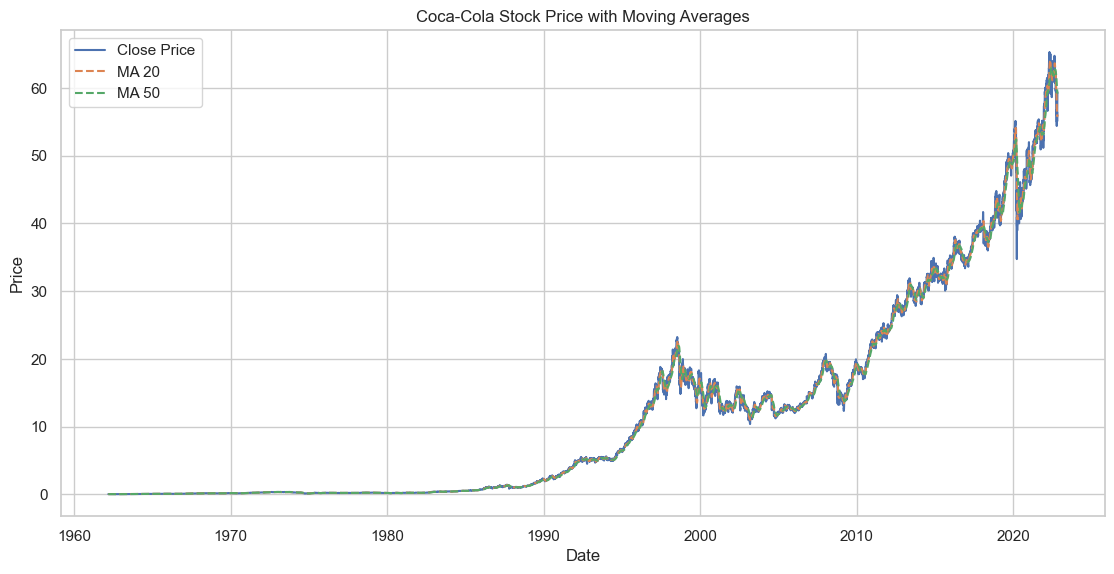

In [54]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['ma_20'], label='MA 20', linestyle='--')
plt.plot(df['date'], df['ma_50'], label='MA 50', linestyle='--')
plt.title("Coca-Cola Stock Price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

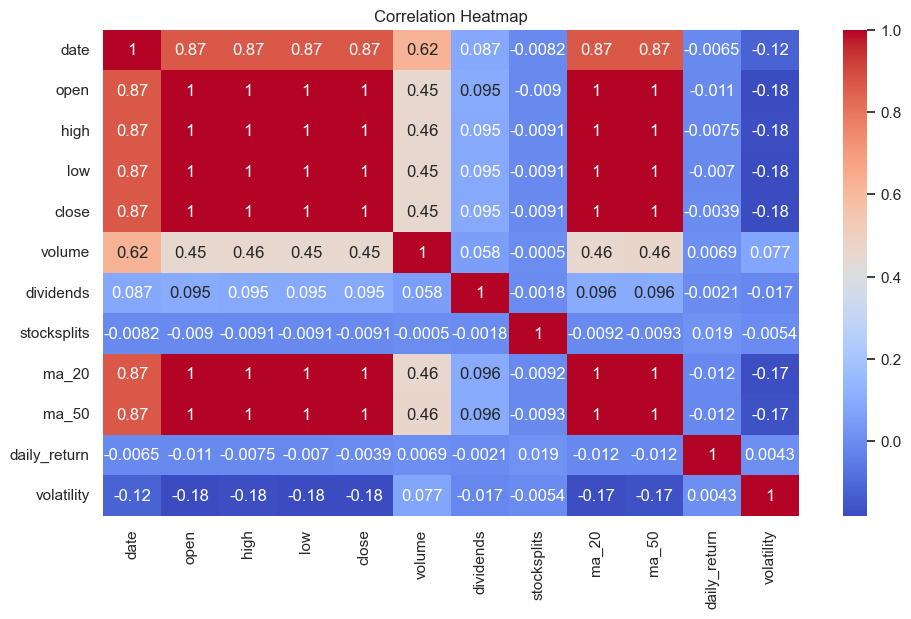

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [56]:
features = ['open', 'high', 'low', 'volume', 'dividends', 'stocksplits',
            'ma_20', 'ma_50', 'daily_return', 'volatility']
target = 'close'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


In [57]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 327.98
Mean Absolute Error: 14.67
R2 Score: -1.86


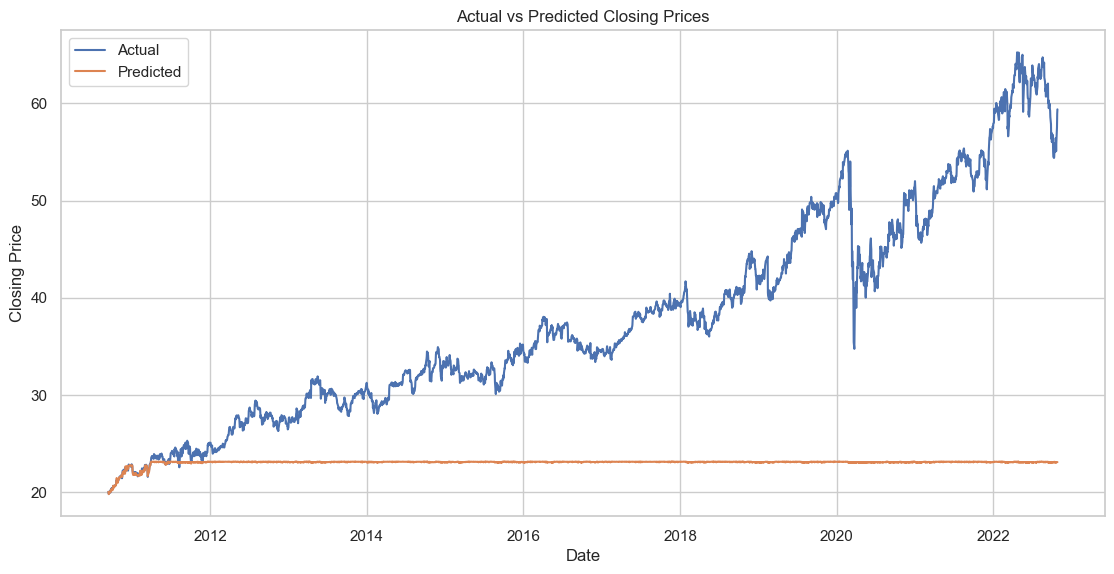

In [59]:
plt.figure(figsize=(12,6))
plt.plot(df['date'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['date'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [68]:
# Load and view stock metadata (optional)
info = pd.read_csv(r"C:\Users\Shiva anand reddy\Downloads\Coca-Cola_stock_info.csv", header=None, names=['Description', 'Information'])
info.dropna(inplace=True)
info.head(10)

,Description,Information
0,Key,Value
1,zip,30313
2,sector,Consumer Defensive
3,fullTimeEmployees,80300
4,longBusinessSummary,"The Coca-Cola Company, a beverage company, man..."
5,city,Atlanta
6,phone,404 676 2121
7,state,GA
8,country,United States
9,companyOfficers,[]


In [69]:
import yfinance as yf

ticker = 'KO'
live_data = yf.download(ticker, period='1d', interval='1m')

# Add missing columns
live_data['Dividends'] = 0
live_data['Stock Splits'] = 0

# Technical indicators
live_data['ma_20'] = live_data['Close'].rolling(window=20).mean()
live_data['ma_50'] = live_data['Close'].rolling(window=50).mean()
live_data['daily_return'] = live_data['Close'].pct_change()
live_data['volatility'] = live_data['daily_return'].rolling(window=20).std()

# Fill missing
live_data.fillna(0, inplace=True)

# Match training features
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits',
            'ma_20', 'ma_50', 'daily_return', 'volatility']

# Prepare input
latest_features = live_data[features].iloc[-1:].dropna()

# Predict
if not latest_features.empty:
    live_prediction = model.predict(latest_features)
    print(f"📈 Predicted Closing Price for {ticker}: ${live_prediction[0]:.2f}")
else:
    print("❌ Not enough data to make a live prediction.")


C:\Users\Shiva anand reddy\AppData\Local\Temp\ipykernel_26228\1859550037.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live_data = yf.download(ticker, period='1d', interval='1m')
[*********************100%***********************]  1 of 1 completed

📈 Predicted Closing Price for KO: $23.15



C:\Users\Shiva anand reddy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [71]:
live_data = yf.download('KO', period='1d', interval='1m', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [73]:
import yfinance as yf
import pandas as pd
import streamlit as st
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [74]:
st.set_page_config(layout="centered")
st.title("📈 Coca-Cola (KO) Stock Price Prediction")


2025-07-11 16:24:17.332 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:24:17.333 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:24:17.934 
  command:

    streamlit run C:\Users\Shiva anand reddy\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-11 16:24:17.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:24:17.936 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [75]:
st.subheader("🔢 Loading historical data...")
df = yf.download('KO', start='2022-01-01', interval='1d', auto_adjust=False)

# Add dividend/split fields for feature compatibility
df['Dividends'] = 0
df['Stock Splits'] = 0


2025-07-11 16:24:39.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:24:39.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:24:39.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  1 of 1 completed


In [76]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()
df.dropna(inplace=True)


In [77]:
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits',
            'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


C:\Users\Shiva anand reddy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [81]:
# Step 4: Fetch live intraday data
st.subheader("🔄 Fetching live 1-minute data...")
live_data = yf.download('KO', period='1d', interval='1m', auto_adjust=False)
live_data['Dividends'] = 0
live_data['Stock Splits'] = 0
live_data['MA_20'] = live_data['Close'].rolling(window=20).mean()
live_data['MA_50'] = live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return'] = live_data['Close'].pct_change()
live_data['Volatility'] = live_data['Daily_Return'].rolling(window=20).std()
live_data.fillna(0, inplace=True)

# Step 5: Predict on latest data
latest_features = live_data[features].iloc[-1:]

2025-07-11 16:27:37.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:27:37.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:27:37.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  1 of 1 completed


In [79]:
latest_features = live_data[features].iloc[-1:]

st.subheader("🔢 Prediction Result")
if not latest_features.empty:
    live_prediction = model.predict(latest_features)[0]
    st.success(f"📍 Predicted Closing Price for KO: **${live_prediction:.2f}**")
else:
    st.error("❌ Not enough data to make a live prediction.")

2025-07-11 16:25:36.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:25:36.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:25:36.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:25:36.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:25:36.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:25:36.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [82]:
# Step 1: Load historical stock data (daily)
st.subheader("🔢 Loading historical data...")
df = yf.download('KO', start='2022-01-01', interval='1d', auto_adjust=False)

# Flatten MultiIndex if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# Rename columns to simplify access
df.rename(columns={
    'Close_KO': 'Close',
    'Open_KO': 'Open',
    'High_KO': 'High',
    'Low_KO': 'Low',
    'Volume_KO': 'Volume'
}, inplace=True)


2025-07-11 16:29:07.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:29:07.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 16:29:07.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  1 of 1 completed
